##### Supervised learning. Classificatioon

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load Barcelona weather_data
df=pd.read_csv('barcelona_rain.csv',index_col=[0])
df=df[['fecha','tmed-1','presMax-1','presMax-2','presMax-3','velmedia-1','velmedia-2','velmedia-3','dir-1','dir-2','dir-3','humidity-1','humidity-2','humidity-3','prec-1','prec-2','prec-3','prec']]
#select only month from the date
df['mes'] = pd.DatetimeIndex(df['fecha']).month
df=df.drop(['fecha'],axis=1)
df1=df.copy()
df

,tmed-1,presMax-1,presMax-2,presMax-3,velmedia-1,velmedia-2,velmedia-3,dir-1,dir-2,dir-3,humidity-1,humidity-2,humidity-3,prec-1,prec-2,prec-3,prec,mes
3,8.4,980.3,976.8,970.3,1.4,1.1,2.8,5.0,20.0,27.0,66.0,72.0,71.0,0.0,0.0,0.0,0.0,3
4,7.4,981.3,980.3,976.8,1.9,1.4,1.1,27.0,5.0,20.0,84.0,66.0,72.0,0.0,0.0,0.0,0.0,3
5,10.7,980.9,981.3,980.3,0.8,1.9,1.4,32.0,27.0,5.0,84.0,84.0,66.0,0.0,0.0,0.0,0.0,3
6,8.9,980.0,980.9,981.3,1.4,0.8,1.9,32.0,32.0,27.0,79.0,84.0,84.0,0.0,0.0,0.0,0.0,3
7,10.6,980.0,980.0,980.9,1.9,1.4,0.8,32.0,32.0,32.0,82.0,79.0,84.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,24.4,968.6,965.2,964.1,4.4,2.8,2.2,31.0,16.0,11.0,62.0,67.0,70.0,0.0,0.0,0.0,0.0,7
13126,24.8,968.5,968.6,965.2,6.4,4.4,2.8,21.0,31.0,16.0,68.0,62.0,67.0,0.0,0.0,0.0,0.0,7
13127,25.2,968.8,968.5,968.6,3.1,6.4,4.4,8.0,21.0,31.0,72.0,68.0,62.0,0.0,0.0,0.0,0.0,7
13128,25.1,968.8,968.8,968.5,3.1,3.1,6.4,20.0,8.0,21.0,72.0,72.0,68.0,0.0,0.0,0.0,0.0,7


In [3]:
# transform target column (prec 'precipitation') to 5 categories
def categ(z):
    if z == 0:
        return "dry"
    elif z > 50:
        return 'violent'
    elif z > 7.6:
        return 'heavy'
    elif z > 2.6:
        return 'moderate'
    else:
        return 'light'
    
df["precipitacion"] = df["prec"].apply(categ)

df=df.drop(['prec'],axis=1)

In [38]:
df.head()

,tmed-1,presMax-1,presMax-2,presMax-3,velmedia-1,velmedia-2,velmedia-3,dir-1,dir-2,dir-3,humidity-1,humidity-2,humidity-3,prec-1,prec-2,prec-3,mes,precipitacion
3,8.40,980.30,976.80,970.30,1.40,1.10,2.80,5.00,20.00,27.00,66.00,72.00,71.00,0.00,0.00,0.00,3,dry
4,7.40,981.30,980.30,976.80,1.90,1.40,1.10,27.00,5.00,20.00,84.00,66.00,72.00,0.00,0.00,0.00,3,dry
5,10.70,980.90,981.30,980.30,0.80,1.90,1.40,32.00,27.00,5.00,84.00,84.00,66.00,0.00,0.00,0.00,3,dry
6,8.90,980.00,980.90,981.30,1.40,0.80,1.90,32.00,32.00,27.00,79.00,84.00,84.00,0.00,0.00,0.00,3,dry
7,10.60,980.00,980.00,980.90,1.90,1.40,0.80,32.00,32.00,32.00,82.00,79.00,84.00,0.00,0.00,0.00,3,dry


##### Prepare the data

In [4]:
#round some columns
df['tmed-1']=df['tmed-1'].astype(int)
df['velmedia-1'] = df['velmedia-1'].round()
df['velmedia-2'] = df['velmedia-2'].round()
df['velmedia-3'] = df['velmedia-3'].round()

In [5]:
from sklearn.preprocessing import MinMaxScaler

#list for cols to scale
cols_to_scale = ['tmed-1','presMax-1','presMax-2','presMax-3','velmedia-1','velmedia-2','velmedia-3','humidity-1','humidity-2','humidity-3']


#create and fit scaler
scaler = MinMaxScaler()
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [6]:
from sklearn.preprocessing import PowerTransformer

cols_to_scale =['prec-1','prec-2','prec-3']

#create and fit scaler
scaler = PowerTransformer()
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [7]:
#cyclical features

#wind direction
df['dir-1_sin'] = np.sin(df['dir-1']*(2.*np.pi/100))
df['dir-1_cos'] = np.cos(df['dir-1']*(2.*np.pi/100))
df['dir-2_sin'] = np.sin(df['dir-2']*(2.*np.pi/100))
df['dir-2_cos'] = np.cos(df['dir-2']*(2.*np.pi/100))
df['dir-3_sin'] = np.sin(df['dir-3']*(2.*np.pi/100))
df['dir-3_cos'] = np.cos(df['dir-3']*(2.*np.pi/100))

# month
df['mes_sin'] = np.sin((df.mes)*(2.*np.pi/12))
df['mes_cos'] = np.cos((df.mes)*(2.*np.pi/12))

In [8]:
df=df.drop(['dir-1','dir-2','dir-3','mes'],axis=1)

In [44]:
df.head()

,tmed-1,presMax-1,presMax-2,presMax-3,velmedia-1,velmedia-2,velmedia-3,humidity-1,humidity-2,humidity-3,...,prec-3,precipitacion,dir-1_sin,dir-1_cos,dir-2_sin,dir-2_cos,dir-3_sin,dir-3_cos,mes_sin,mes_cos
3,0.31,0.75,0.69,0.56,0.05,0.05,0.15,0.59,0.67,0.66,...,-0.51,dry,0.31,0.95,0.95,0.31,0.99,-0.13,1.00,0.00
4,0.28,0.77,0.75,0.69,0.10,0.05,0.05,0.83,0.59,0.67,...,-0.51,dry,0.99,-0.13,0.31,0.95,0.95,0.31,1.00,0.00
5,0.36,0.77,0.77,0.75,0.05,0.10,0.05,0.83,0.83,0.59,...,-0.51,dry,0.90,-0.43,0.99,-0.13,0.31,0.95,1.00,0.00
6,0.31,0.75,0.77,0.77,0.05,0.05,0.10,0.76,0.83,0.83,...,-0.51,dry,0.90,-0.43,0.90,-0.43,0.99,-0.13,1.00,0.00
7,0.36,0.75,0.75,0.77,0.10,0.05,0.05,0.80,0.76,0.83,...,-0.51,dry,0.90,-0.43,0.90,-0.43,0.90,-0.43,1.00,0.00


<br><br><br><br>
##### Search and perfom the bes classification model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report,plot_confusion_matrix
from sklearn.pipeline import Pipeline

In [29]:
#result scores from LazyPredict made with kaggle

In [ ]:
dictionary={'Accuracy': {'NearestCentroid': 0.522173801589336,
  'GaussianNB': 0.6964880799794925,
  'QuadraticDiscriminantAnalysis': 0.7203281209946167,
  'BernoulliNB': 0.7495513970776724,
  'DecisionTreeClassifier': 0.6306075365290951,
  'Perceptron': 0.6621379133555498,
  'PassiveAggressiveClassifier': 0.6923865675467828,
  'ExtraTreeClassifier': 0.6336836708536273,
  'AdaBoostClassifier': 0.7764675724173289,
  'LinearDiscriminantAnalysis': 0.7690335811330428,
  'LabelPropagation': 0.6431684183542682,
  'LabelSpreading': 0.6423993847731351,
  'BaggingClassifier': 0.7580107664701359,
  'KNeighborsClassifier': 0.7590361445783133,
  'XGBClassifier': 0.7677518584978211,
  'SGDClassifier': 0.7782619841066393,
  'LGBMClassifier': 0.7759548833632401,
  'RandomForestClassifier': 0.7790310176877724,
  'ExtraTreesClassifier': 0.7777492950525506,
  'LogisticRegression': 0.7744168162009741,
  'CalibratedClassifierCV': 0.7756985388361959,
  'DummyClassifier': 0.6300948474750064,
  'RidgeClassifierCV': 0.7769802614714176,
  'RidgeClassifier': 0.7767239169443733,
  'LinearSVC': 0.7767239169443733,
  'SVC': 0.7782619841066393},
 'Balanced Accuracy': {'NearestCentroid': 0.3147076253010789,
  'GaussianNB': 0.28896467394127656,
  'QuadraticDiscriminantAnalysis': 0.25083945788944834,
  'BernoulliNB': 0.24259439568767283,
  'DecisionTreeClassifier': 0.23780070772409406,
  'Perceptron': 0.23674796752501165,
  'PassiveAggressiveClassifier': 0.23510526664788295,
  'ExtraTreeClassifier': 0.23065245719181746,
  'AdaBoostClassifier': 0.22535083289879204,
  'LinearDiscriminantAnalysis': 0.22443737028107838,
  'LabelPropagation': 0.22173776699461434,
  'LabelSpreading': 0.22115556423849853,
  'BaggingClassifier': 0.22043750545531812,
  'KNeighborsClassifier': 0.21562486540000428,
  'XGBClassifier': 0.21268105864466716,
  'SGDClassifier': 0.21046043963664102,
  'LGBMClassifier': 0.20871264867625716,
  'RandomForestClassifier': 0.2083034070967417,
  'ExtraTreesClassifier': 0.20462123682771072,
  'LogisticRegression': 0.20294966572499615,
  'CalibratedClassifierCV': 0.20284843967088748,
  'DummyClassifier': 0.20185683775149393,
  'RidgeClassifierCV': 0.20043976783107217,
  'RidgeClassifier': 0.20037389167823952,
  'LinearSVC': 0.20037389167823952,
  'SVC': 0.2},
 'ROC AUC': {'NearestCentroid': None,
  'GaussianNB': None,
  'QuadraticDiscriminantAnalysis': None,
  'BernoulliNB': None,
  'DecisionTreeClassifier': None,
  'Perceptron': None,
  'PassiveAggressiveClassifier': None,
  'ExtraTreeClassifier': None,
  'AdaBoostClassifier': None,
  'LinearDiscriminantAnalysis': None,
  'LabelPropagation': None,
  'LabelSpreading': None,
  'BaggingClassifier': None,
  'KNeighborsClassifier': None,
  'XGBClassifier': None,
  'SGDClassifier': None,
  'LGBMClassifier': None,
  'RandomForestClassifier': None,
  'ExtraTreesClassifier': None,
  'LogisticRegression': None,
  'CalibratedClassifierCV': None,
  'DummyClassifier': None,
  'RidgeClassifierCV': None,
  'RidgeClassifier': None,
  'LinearSVC': None,
  'SVC': None},
 'F1 Score': {'NearestCentroid': 0.5925870980672903,
  'GaussianNB': 0.6785169863752581,
  'QuadraticDiscriminantAnalysis': 0.6979131375896598,
  'BernoulliNB': 0.6901817057837406,
  'DecisionTreeClassifier': 0.6450567690936585,
  'Perceptron': 0.6580000150491649,
  'PassiveAggressiveClassifier': 0.6662209486053287,
  'ExtraTreeClassifier': 0.6435629349511592,
  'AdaBoostClassifier': 0.6852163939693546,
  'LinearDiscriminantAnalysis': 0.6928827314707594,
  'LabelPropagation': 0.6452070766257314,
  'LabelSpreading': 0.6444573818933514,
  'BaggingClassifier': 0.6921767259880712,
  'KNeighborsClassifier': 0.6912636686591109,
  'XGBClassifier': 0.6921602396016749,
  'SGDClassifier': 0.6818732140601036,
  'LGBMClassifier': 0.6885549586489641,
  'RandomForestClassifier': 0.6874892640874599,
  'ExtraTreesClassifier': 0.6863984273450696,
  'LogisticRegression': 0.6848115446545348,
  'CalibratedClassifierCV': 0.6847103534611235,
  'DummyClassifier': 0.627829276962368,
  'RidgeClassifierCV': 0.6818231020142602,
  'RidgeClassifier': 0.6816944443135017,
  'LinearSVC': 0.6816944443135017,
  'SVC': 0.6812176398292509},
 'Time Taken': {'NearestCentroid': 0.11684632301330566,
  'GaussianNB': 0.06378531455993652,
  'QuadraticDiscriminantAnalysis': 0.15896940231323242,
  'BernoulliNB': 0.10355925559997559,
  'DecisionTreeClassifier': 0.21651458740234375,
  'Perceptron': 0.14423441886901855,
  'PassiveAggressiveClassifier': 0.12075161933898926,
  'ExtraTreeClassifier': 0.06882929801940918,
  'AdaBoostClassifier': 1.1271412372589111,
  'LinearDiscriminantAnalysis': 0.13124322891235352,
  'LabelPropagation': 4.791802406311035,
  'LabelSpreading': 6.568265438079834,
  'BaggingClassifier': 0.9293115139007568,
  'KNeighborsClassifier': 1.7301909923553467,
  'XGBClassifier': 2.73999285697937,
  'SGDClassifier': 0.34676575660705566,
  'LGBMClassifier': 1.0974905490875244,
  'RandomForestClassifier': 2.191967010498047,
  'ExtraTreesClassifier': 1.3710556030273438,
  'LogisticRegression': 0.9159328937530518,
  'CalibratedClassifierCV': 18.672688961029053,
  'DummyClassifier': 0.05605173110961914,
  'RidgeClassifierCV': 0.15302276611328125,
  'RidgeClassifier': 0.11116147041320801,
  'LinearSVC': 4.9518396854400635,
  'SVC': 8.170819282531738}}

In [32]:
lazy=pd.DataFrame.from_dict(dictionary)
lazy.sort_values(by=['Accuracy'], ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
RandomForestClassifier,0.78,0.21,None,0.69,2.19
SVC,0.78,0.20,None,0.68,8.17
SGDClassifier,0.78,0.21,None,0.68,0.35
ExtraTreesClassifier,0.78,0.20,None,0.69,1.37
RidgeClassifierCV,0.78,0.20,None,0.68,0.15
LinearSVC,0.78,0.20,None,0.68,4.95
RidgeClassifier,0.78,0.20,None,0.68,0.11
AdaBoostClassifier,0.78,0.23,None,0.69,1.13
LGBMClassifier,0.78,0.21,None,0.69,1.10
CalibratedClassifierCV,0.78,0.20,None,0.68,18.67


In [10]:
#split the data:
X,y = df.loc[:, df.columns != 'precipitacion'],df.loc[:, df.columns == 'precipitacion']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#fix the imbalanced dataset

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [12]:
rfc = RandomForestClassifier()

steps = [('classifier', rfc)]
pipeline = Pipeline(steps) # define the pipeline object.

In [48]:
#Grid Search

In [34]:
parameteres = {
    'classifier__n_estimators': [100, 500, 1200],
    'classifier__max_features': ['auto','sqrt','log2'],
    'classifier__class_weight':['balanced',None],
    'classifier__criterion' :['gini', 'entropy']
}

grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [35]:
grid.fit(X_res, y_res)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

score = 0.75
{'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_features': 'auto', 'classifier__n_estimators': 100}


In [36]:
clf=RandomForestClassifier(max_depth=4, random_state=42, criterion='entropy', n_estimators=100,max_features='auto',class_weight=None)
scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean()
print('Accuracy Score: %.4f' % scores)

Accuracy Score: 0.7779


In [37]:
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))

[[1631   85   21  104  182]
 [  57   24    7   23   43]
 [ 165   37    7   27   53]
 [  71    9    1   20   23]
 [   4    4    0    1    2]]


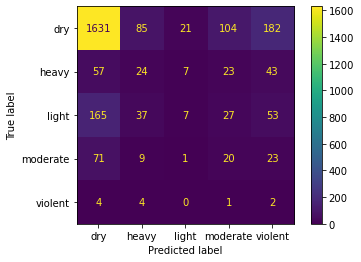

In [40]:
plot_confusion_matrix(clf, X_test, y_test)  

plt.savefig('classification_heat.jpg', scale=6)